The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3] Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

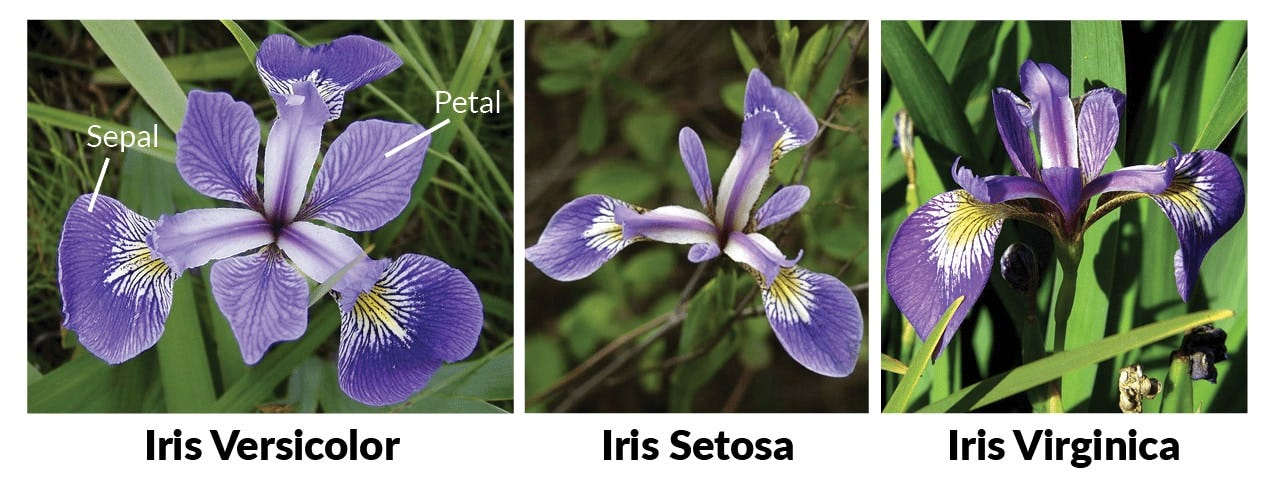

In this exercise we try to clustering Iris Dataset used Kmeans

Attribute Information:

sepal length in cm

sepal width in cm

petal length in cm

petal width in cm

class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

import libraries and load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

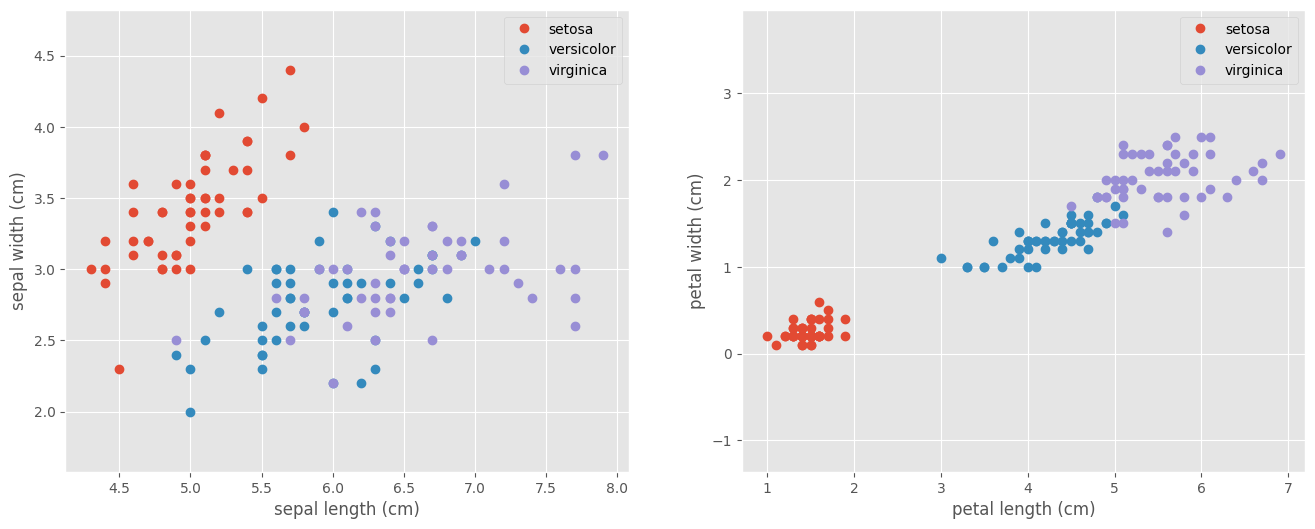

In [ ]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [ ]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, layers=1, name='model'):
      # Create model
      model = Sequential(name=name)
      for i in range(layers):
          model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
      model.add(Dense(output_dim, activation='softmax'))

      # Compile model
      model.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy'])
      return model

n_layers = 1 # must be greater than 0
n_hidden_neurons = 8
model = create_custom_model(n_features, n_classes, n_hidden_neurons, n_layers) 
          
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()


history_callback = model.fit(X_train, Y_train,
                              batch_size=5,
                              epochs=50,
                              verbose=1,
                              validation_data=(X_test, Y_test),
                              callbacks=[cb])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history_callback)
history_dict[model.name] = [history_callback, model]

Epoch 1/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1527 - accuracy: 0.9667 - val_loss: 0.1601 - val_accuracy: 0.9417
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.1512 - accuracy: 0.9667 - val_loss: 0.1602 - val_accuracy: 0.9417
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1494 - accuracy: 0.9667 - val_loss: 0.1605 - val_accuracy: 0.9417
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1478 - accuracy: 0.9667 - val_loss: 0.1613 - val_accuracy: 0.9417
Epoch 5/50
6/6 [==============================] - 0s 22ms/step - loss: 0.1457 - accuracy: 0.9667 - val_loss: 0.1619 - val_accuracy: 0.9500
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1442 - accuracy: 0.9667 - val_loss: 0.1627 - val_accuracy: 0.9500
Epoch 7/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1426 - accuracy: 0.9667 - val_loss: 0.1634 - val_accuracy: 0.9500
Epoch 8/50
6/6 [===========

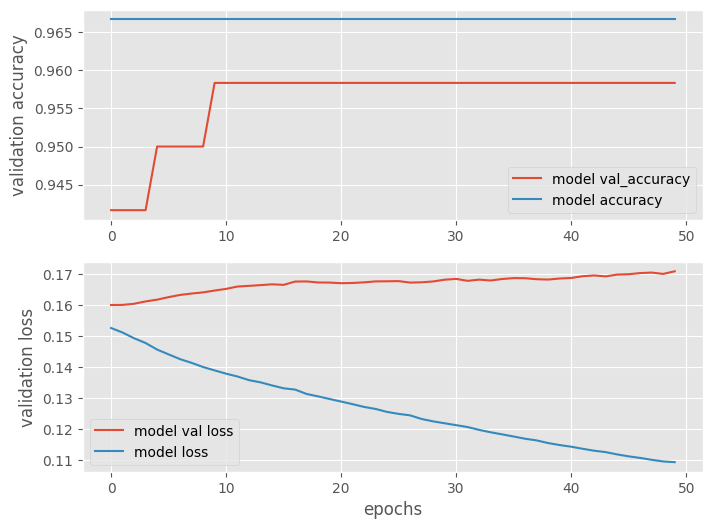

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accuracy = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    accuracy = history_dict[model_name][0].history['accuracy']
    loss = history_dict[model_name][0].history['loss']
    ax1.plot(val_accuracy, label=model_name+ " val_accuracy")
    ax1.plot(accuracy, label=model_name + " accuracy")
    ax2.plot(val_loss, label=model_name+ " val loss")
    ax2.plot(loss, label=model_name+ " loss")
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();